In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#liittyy grafiikan tulostamiseen näytölle

from matplotlib.ticker import PercentFormatter
#prosenttimerkin muotoiluun ja tulostusasuun liittyvä extra

myFmt1 = PercentFormatter(xmax = 1, decimals = 0, symbol = ' %')
#jos prosentit desimaalilukuja
myFmt100 = PercentFormatter(xmax = 100, decimals = 0, symbol = ' %')
#jos prosentit on jo valmiiksi kerrottu sadalla

In [2]:
df = pd.read_csv('http://taanila.fi/employee.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
Education = ['Peruskoulu', 'Toinen aste', 'Korkeakoulu', 'Ylempi korkeakoulu', 'Yliopisto']
EnvironmentSatisfaction = ['Matala', 'Keskitaso', 'Korkea', 'Erittäin korkea']
JobInvolvement = ['Matala', 'Keskitaso', 'Korkea', 'Erittäin korkea']
JobSatisfaction = ['Matala', 'Keskitaso', 'Korkea', 'Erittäin korkea']
PerformanceRating = ['Matala', 'Hyvä', 'Erittäin hyvä', 'Erinomainen']
RelationshipSatisfaction = ['Matala', 'Hyvä', 'Erittäin hyvä', 'Erinomainen']
WorkLifeBalance = ['Huono', 'Hyvä', 'Parempi', 'Paras']
Gender = ['Nainen', 'Mies']

In [4]:
# Sarakkeen uudelleen nimeäminen liittyy soluun 12
df.rename(columns = {'EnvironmentSatisfaction': 'Työympäristötyyt.'}, inplace = True)

In [5]:
# Tarkastellaan koulutusastetta
df1 = pd.crosstab(df['Education'], 'lkm')
df1.index = Education
df1.columns.name = 'Koulutusaste'

# Lisätään %-sarake ja muotoillaan yhden desimaalin tarkkuuteen
df1['%'] = df1/df1.sum()*100
df1.style.format({'%': '{:.1f} %'})

Koulutusaste,lkm,%
Peruskoulu,170,11.6 %
Toinen aste,282,19.2 %
Korkeakoulu,572,38.9 %
Ylempi korkeakoulu,398,27.1 %
Yliopisto,48,3.3 %


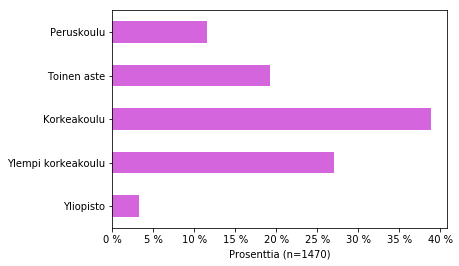

In [6]:
# Kaavio koulutusasteesta
ax1 = df1['%'].plot.barh(color = '#D565DC')
ax1.set_xlabel('Prosenttia')

# käännetään kaavion y-akselin selite samoinpäin kuin taulukossa
plt.gca().invert_yaxis()

# Lisätään n-luku
n = df1['lkm'].sum()
ax1.set_xlabel('Prosenttia (n=' + str(n) + ')')
ax1.xaxis.set_major_formatter(myFmt100)

In [7]:
# Tarkastellaan koulutusastetta sukupuolen mukaan
df2 = pd.crosstab(df['Education'], df['Gender'])
df2.index = Education
df2.columns = Gender
df2.columns.name = 'Koulutusaste'
df2

Koulutusaste,Nainen,Mies
Peruskoulu,60,110
Toinen aste,117,165
Korkeakoulu,235,337
Ylempi korkeakoulu,154,244
Yliopisto,22,26


In [8]:
# Muutetaan lukumäärät prosenteiksi, lisätään n-luku sekä muotoillaan %-luku yhden desimaalin tarkkuuteen
df3 = pd.crosstab(df['Education'], df['Gender'], normalize = 'columns')
df3.index = Education
Female = df2['Nainen'].sum()
Male = df2['Mies'].sum()
df3.columns = ['Nainen (n = ' + str(Female) +')', 'Mies (n = ' + str(Male) +')']
df3.columns.name = 'Koulutusaste'
(df3*100).style.format('{:.1f} %')

Koulutusaste,Nainen (n = 588),Mies (n = 882)
Peruskoulu,10.2 %,12.5 %
Toinen aste,19.9 %,18.7 %
Korkeakoulu,40.0 %,38.2 %
Ylempi korkeakoulu,26.2 %,27.7 %
Yliopisto,3.7 %,2.9 %


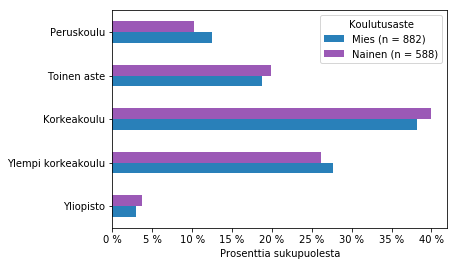

In [9]:
# Kaavio sukupuoli jakaumasta koulutusasteessa sekä y-akselin selitteen kääntö
ax3 = df3.plot.barh(legend = 'reverse', color = ['#9B59B6', '#2980B9'])
ax3.set_xlabel('Prosenttia sukupuolesta')
plt.gca().invert_yaxis()
ax3.xaxis.set_major_formatter(myFmt1)

In [10]:
# Tarkastellaan mielipidettä työn ja vapaa-ajan tasapainosta sukupuolittain
df4 = pd.crosstab(df['WorkLifeBalance'], df['Gender'], normalize = 'columns')
df4.index = WorkLifeBalance
Female = df2['Nainen'].sum()
Male = df2['Mies'].sum()
df4.columns = ['Nainen (n = ' + str(Female) +')', 'Mies (n = ' + str(Male) +')']
df4.columns.name = 'Tasapaino'
(df4*100).style.format('{:.1f} %')

Tasapaino,Nainen (n = 588),Mies (n = 882)
Huono,5.1 %,5.7 %
Hyvä,23.1 %,23.6 %
Parempi,62.1 %,59.9 %
Paras,9.7 %,10.9 %


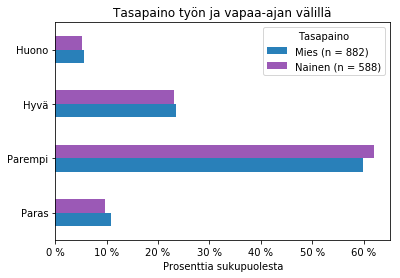

In [11]:
# Kaavio tasapainosta työn ja vapaa-ajan välillä sekä y-akselin selitteen kääntö
ax4 = df4.plot.barh(legend = 'reverse', color = ['#9B59B6', '#2980B9'], title = 'Tasapaino työn ja vapaa-ajan välillä')
ax4.set_xlabel('Prosenttia sukupuolesta')
plt.gca().invert_yaxis()
ax4.xaxis.set_major_formatter(myFmt1)

In [12]:
# Tarkastellaan työtyytyväisyyttä
df5 = df['Työympäristötyyt.'].value_counts(sort = False, normalize = True).to_frame()
df5['Sitoutuminen'] = df['JobInvolvement'].value_counts(sort = False, normalize = True)
df5['Työtyyt.'] = df['JobSatisfaction'].value_counts(sort = False, normalize = True)
df5['Suorituskyky'] = df['PerformanceRating'].value_counts(sort = False, normalize = True)
df5['Työsuhdetyyt.'] = df['RelationshipSatisfaction'].value_counts(sort = False, normalize = True)
df5.index = JobInvolvement
df5.columns.name = 'Työtyytyväisyysaste'
(df5*100).style.format('{:.1f} %')

Työtyytyväisyysaste,Työympäristötyyt.,Sitoutuminen,Työtyyt.,Suorituskyky,Työsuhdetyyt.
Matala,19.3 %,5.6 %,19.7 %,nan %,18.8 %
Keskitaso,19.5 %,25.5 %,19.0 %,nan %,20.6 %
Korkea,30.8 %,59.0 %,30.1 %,84.6 %,31.2 %
Erittäin korkea,30.3 %,9.8 %,31.2 %,15.4 %,29.4 %


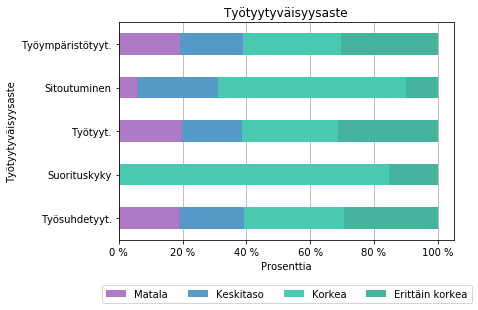

In [13]:
# Pinottu kaavio työtyytyväisyysasteesta, kaavioon otsikko, y-akselin selitteen kääntö, viivoitus kaavioon sekä selitteen paikka
ax5 = df5.T.plot.barh(stacked = True, color = ['#AF7AC5','#5499C7','#48C9B0','#45B39D'], title = 'Työtyytyväisyysaste')
ax5.xaxis.set_major_formatter(myFmt1)
ax5.set_xlabel('Prosenttia')
plt.gca().invert_yaxis()
ax5.grid(axis = 'x')
ax5.set_axisbelow(True)
ax5.legend(loc = (-0.05,-0.29), ncol = 4)